In [10]:
import numpy as np
import gym
import numpy as np
import matplotlib.pyplot as plt

#to allow the agent to train for a max of 100000 steps
gym.envs.register(

    id='MountainCarMyEasyVersion-v0',

    entry_point='gym.envs.classic_control:MountainCarEnv' ,

    max_episode_steps=100000,      # MountainCar-v0 uses 200
    )

env = gym.make('MountainCarMyEasyVersion-v0')
slow = False
reward = None
steps_to_goal = []
epsilon=0.1
G = 0
gamma = 1
alpha= 0.1
number_states=20
#mode 1 for sarsa 0 for Q-learning
mode=1
q_table = np.zeros((number_states, number_states, 3))

def observation_to_state(env, observation, number_states):
    # map an observation to state
    environment_low = env.observation_space.low
    environment_high = env.observation_space.high
    environment_dx = (environment_high - environment_low) / number_states
    # observation[0]:position ;  observation[1]: volecity
    p = int((observation[0] - environment_low[0])/environment_dx[0])
    v = int((observation[1] - environment_low[1])/environment_dx[1])
    # p:position, v:velocity
    return p, v


for i in range(100000):

    #first state in the episode
    observation = env.reset()
    done = False
    G, reward, timesteps = 0,0,0
    policy = np.argmax(q_table, axis=2)
    
    starts=True
    
    while not done:
        p, v = observation_to_state(env, observation, number_states)
        if slow: env.render()
           
        #to make the first action of an episode always random
        if(starts):
            action = env.action_space.sample()
            starts=False

        if np.random.uniform(0, 1) < epsilon:
            # get random action
            action = np.random.choice(env.action_space.n)
        else:
            #gets the action according to the policy
            action = policy[p][v]

        #next observation according to the action
        observation_2, reward, done, info = env.step(action)
        #new state given the action
        p_, v_ = observation_to_state(env, observation_2, number_states)
        #new action according to the new state and the policy for that state needed for SARSA
        new_action = policy[p_][v_]

        if mode==1:
            #SARSA update
            q_table[p][v][action] = q_table[p][v][action] + alpha * (reward +  (gamma * q_table[p_][v_][new_action] - q_table[p][v][action]))
        else:
            #Q learning update
            q_table[p][v][action] = q_table[p][v][action] + alpha * (reward +  (gamma * np.max(q_table[p_][v_]) - q_table[p][v][action]))
        
        #policy update
        policy = np.argmax(q_table, axis=2)
        #cumulative reward
        G += reward
        #to continue from the state we are at now
        observation = observation_2
        timesteps+=1

        if slow: print (observation)
        if slow: print (reward)
        if slow: print (done, timesteps, G)
        #to see how many steps it took for each episode    
        if done :
            steps_to_goal.append(timesteps)
    #to see the progress   
    if i % 100 == 0:
        
        print ('Iteration number' , i, "Episode finished after ", timesteps, "timesteps.", "acc reward: ", G)

#getting the max values of the q-tables and printing them
daaamn=np.amax(q_table, axis=2)
plt.imshow(daaamn, origin='lower');
plt.colorbar()
plt.show()
#Printing the best policy
print (policy)
#ploting the steps to goal per episode
for i in range(0, steps_to_goal(1000)):
           steps_to_goal[i] = -steps_to_goal[i]     
plt.plot(steps_to_goal)
plt.show()

Error: ignored

20


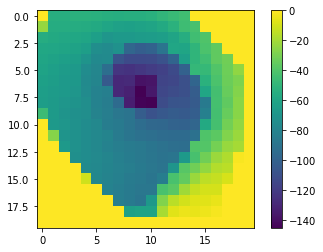

[[0 1 1 2 0 2 0 1 0 1 2 2 2 0 0 0 0 0 0 0]
 [1 1 0 2 2 2 2 2 2 1 2 0 1 2 2 0 0 0 0 0]
 [0 1 2 1 1 1 2 2 1 1 1 2 2 0 1 2 0 0 0 0]
 [1 0 0 0 1 0 2 1 0 2 1 2 2 1 2 2 2 0 0 0]
 [0 2 0 2 0 0 0 1 1 2 1 2 2 1 1 0 2 2 0 0]
 [0 0 0 0 0 0 0 2 1 2 2 2 0 2 2 2 2 2 2 0]
 [1 0 0 0 0 0 0 0 0 2 2 2 1 0 2 2 2 2 0 0]
 [0 1 0 0 0 0 0 1 0 0 2 2 2 2 2 2 2 0 2 0]
 [1 0 1 0 2 0 0 0 0 0 0 2 2 2 2 2 2 2 2 0]
 [0 0 0 1 0 2 0 0 0 1 2 2 2 2 2 2 1 2 2 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 2 2 1 1 0]
 [0 0 0 0 0 0 0 0 2 0 0 1 0 1 1 2 1 1 2 0]
 [0 0 0 0 1 0 1 1 0 0 0 0 0 0 2 1 2 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 2 2 0 0]
 [0 0 0 0 0 1 0 2 0 1 1 2 1 2 2 2 1 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 2 2 2 2 2 2 2 0 0 0]
 [0 0 0 0 0 0 0 0 2 1 2 2 2 2 1 2 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


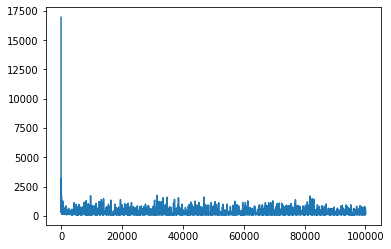

IndexError: ignored

In [4]:
print(len(q_table))
daaamn=np.amax(q_table, axis=2)
plt.imshow(daaamn);
plt.colorbar()
plt.show()
#Printing the best policy
print (policy)
#ploting the steps to goal per episode
plt.plot(steps_to_goal)
plt.show()
acc_r=[]
for i in range(len(steps_to_goal)):
  acc_r=steps_to_goal[i]
#plt.plot(acc_r)
#plt.show()
my_array = np.array(acc_r)
plt.plot([i+1 for i in range(0,100000,1)], my_array[:])
plt.xlabel('Episode no.')
plt.ylabel('Score')
plt.show()